<h1>Using the pre-trained BERT model from Hugging Face for sentiment analysis on some data and reviews that I scraped from Yelp.com</h1>
<h1>The pre-trained model is bert-base-multilingual-uncased model finetuned for sentiment analysis on product reviews in six languages: English, Dutch, German, French, Spanish, and Italian. It predicts the sentiment of the review as a number of stars (between 1 and 5).</h1>
<h1>From Yelp.com, I chose 'Shiraz Kitchen & Wine Bar' to scrape its reviews. It's a Persian restaurant in New York. Unfortunately, I've never been to NY, but I added this restaurant to my bucket list for when I'll be visiting NY. So, fingers are crossed :))) </h1>

<div align=center> <img src="s.jpg" width="300"  /> </div>

-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------

<h2> Importing Necessary Libraries:
 </h2>

In [1]:
#tokenizer allow us to pass through a string and convert that into a sequence of numbers so we can pass to our NLP model
#auto model is going to give us the architecture from transformers to be able to load in the NLP model
#use argmax from torch to be able to extract the highest sequence result
#use requests to extract data from webpage
#use BeautifulSoup to traverse the dom result from Yelp.com
#use re to create a regex function to be able to extract the specific comment
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<h2> Instantiate Model</h2>

In [2]:
#instantiate pre-trained BERT model
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

<h2> Web Scraping Yelp.com and Collecting Reviews: </h2>

In [3]:
#sending request to the Yelp website to scrape the data with BeautifulSoup
reviews = []  # Create an empty list to store the reviews
for i in range(0, 100, 10):  # Loop through a range of numbers from 0 to 100 with a step of 10
    url = f'https://www.yelp.com/biz/shiraz-kitchen-and-wine-bar-new-york?start={i}'  # Construct the URL with the current value of i
    r = requests.get(url)  # Send a GET request to the URL and store the response
    soup = BeautifulSoup(r.text, 'html.parser')  # Create a BeautifulSoup object to parse the HTML content
    regex = re.compile('.*comment.*')  # Create a regular expression pattern to match the class attribute of the <p> tags
    results = soup.find_all('p', {'class': regex})  # Find all <p> tags with the specified class attribute
    reviews += [result.text for result in results]  # Extract the text from each <p> tag and add it to the reviews list

<h2> Calculating Sentiment: </h2>

In [4]:
sentiments = []  # Create an empty list to store the sentiment scores
for review in reviews:  # Iterate over each review in the list of reviews
    tokens = tokenizer.encode(review, return_tensors='pt')  # Tokenize the review using the BERT tokenizer
    result = model(tokens)  # Pass the tokens through the BERT model to get the sentiment score
    # We want to score from 1 to 5 (default starts with 0)
    sentiment = int(torch.argmax(result.logits)) + 1  # Get the sentiment score by finding the index of the maximum value and adding 1
    sentiments.append(sentiment)  # Add the sentiment score to the list of sentiments

<h2>The DataFrame:</h2>

<h3> Here, we can see all 106 review comments along with their sentiment scores, which range from 1 to 5. </h3>

In [5]:
#creating the data frame
df = pd.DataFrame({'review': reviews, 'sentiment': sentiments})
df

,review,sentiment
0,The food was full of flavor and unique! Lots o...,4
1,One of the best kosher Persian restaurants!Bee...,5
2,Came here on a weekday night and the ambiance ...,4
3,First night in NYC and we decided on Persian s...,5
4,Best Persian food experienced outside of a rel...,5
...,...,...
101,Had a great lunch with my friends at this rest...,5
102,My DIL is Iranian and this is her favorite pla...,5
103,I was right next door at West Elm looking at c...,5
104,Unfortunately not a great experience. The food...,2


<h2>Calculating the overall sentiment score of the reviews by taking the average of the sentiment scores:</h2>

<h3> The average sentiment score is 4.5, which suggests that the restaurant is of high quality and has received positive reviews.</h3>

In [6]:
overall_sentiment = df['sentiment'].mean()
print(f'Overall sentiment score: {overall_sentiment}')

Overall sentiment score: 4.566037735849057


<h2>Visualizing the distribution of the sentiment scores using a histogram:</h2>

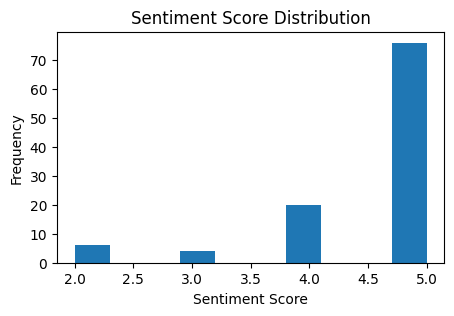

In [7]:
plt.style.use('default')
# Histogram
plt.figure(figsize=(5, 3))
plt.hist(df['sentiment'])
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

<h2>Identifying the most positive and negative reviews based on their sentiment scores:</h2>

In [8]:
# Sort the DataFrame by sentiment score in descending order
df_sorted = df.sort_values('sentiment', ascending=False)

# Print the top 5 most positive reviews
print('Top 5 most positive reviews:')
print(df_sorted.head(5))

print('\n')

# Print the top 5 most negative reviews
print('Top 5 most negative reviews:')
print(df_sorted.tail(5))

Top 5 most positive reviews:
                                                review  sentiment
105  Best Persian restaurant. It's like having home...          5
48   We loved our visit to Shiraz! The wine menu wa...          5
55   Amazing food.  Excellent service. Best in nyc....          5
82   Excellent Persian food, comfortable stylish sp...          5
1    One of the best kosher Persian restaurants!Bee...          5


Top 5 most negative reviews:
                                                review  sentiment
97   Since i wrote the review of the Chelsea locati...          2
98   The location is great and so is the decor. The...          2
54   Outrageously expensive for mediocre food, even...          2
56   My girlfriend and I came to this restaurant wi...          2
104  Unfortunately not a great experience. The food...          2
